In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

This is written using LaTeX in Markdown display mode<BR>
The control volume of this system is the water in the tank with a mass m or volume V<BR>
$$\text{Accumulation = rate of mass in - rate of mass out}$$ <BR>
$$\frac{dm}{dt}=\dot{m}_{in}-\dot{m}_{out}$$ 
$$\dot{m}_{in}=1.61 g/s=1.61\times 10^{-3}kg/s$$<BR>
$$\dot{m}_{out}=\rho A_{out}\left(2g\frac{4m}{\pi D^2\rho}\right)^{0.5}$$<BR>
$$\text{at}\, t=0\,m_i=145g$$<BR>
with
$\rho=1000 \,kg/m^3$
$D=0.075m$
$g=9.81 m/s^2$


In [9]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    m = Yfuncvec[0] 
    
    
    rho=1000
    g=9.81
    D=0.075
    Aout=np.pi/4*0.001**2
    mdotOUT=rho*Aout*(2*g*4*m/np.pi/D**2/rho)**0.5
    
    dmdt = 1.61e-3-mdotOUT
    
    dYfuncvecdt = [dmdt] 
    return dYfuncvecdt 

In [10]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
m0 = [0.145] # Initial values for the dependent variables V
sol=ODEfun(0,m0)#Evaluates the derivatives at t=0s
print (sol)

[0.0009797437226652214]


In [11]:
m=0.145
rho=1000
g=9.81
D=0.075
Aout=np.pi/4*0.001**2
Atank=np.pi/4*0.075**2
vout=(2*g*4*m/np.pi/D**2/rho)**0.5
mdotOUT=rho*Aout*(2*g*4*m/np.pi/D**2/rho)**0.5

dmdt = 1.61e-3-mdotOUT   
print(dmdt,mdotOUT,Aout,Atank,vout)

0.0009797437226652214 0.0006302562773347787 7.853981633974482e-07 0.004417864669110647 0.8024672156202121


In [12]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,176) # Range for the independent variable t 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,m0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   0.27204959,   2.99254547,  30.19750432,
       176.        ])
 t_events: None
        y: array([[0.145     , 0.14526646, 0.14792245, 0.17366474, 0.29169792]])
 y_events: None


Plotting the results from t = 0 to 176s


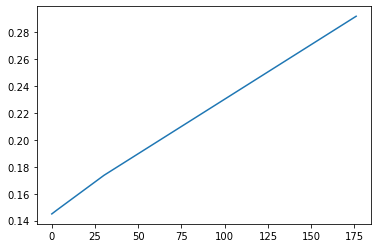

In [13]:
#This is a simple plot
plt.plot(sol.t,sol.y[0])

In the notes it asks how long it would take to double the mass
$$\frac{dm}{dt}=\dot{m}_{in}-\dot{m}_{out}$$ 
Rearranging the ODE
$$\frac{dt}{dm}=\frac{1}{\dot{m}_{in}-\dot{m}_{out}}$$ 
$$\dot{m}_{in}=1.61 g/s=1.61\times 10^{-3}kg/s$$<BR>
$$\dot{m}_{out}=\rho A_{out}\left(2g\frac{4m}{\pi D^2\rho}\right)^{0.5}$$<BR>
$$\text{at}\, t=0\,m_i=145g$$<BR>
with
$\rho=1000 \,kg/m^3$
$D=0.075m$
$g=9.81 m/s^2$


In [14]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEInversefun(m,tfuncvec):#fun(t,y) and return dy/dt
    t = tfuncvec[0] 
        
    rho=1000
    g=9.81
    D=0.075
    Aout=np.pi/4*0.001**2
    mdotOUT=rho*Aout*(2*g*4*m/np.pi/D**2/rho)**0.5
    
    dtdm = 1/(1.61e-3-mdotOUT)
    
    dtfuncvecdm = [dtdm] 
    return dtfuncvecdm

In [15]:
rho=1000
g=9.81
D=0.075
Aout=np.pi/4*0.001**2

m=0.145
mdotOUT=rho*Aout*(2*g*4*m/np.pi/D**2/rho)**0.5

dtdm = 1/(1.61e-3-mdotOUT)
print(mdotOUT,dtdm)
 

0.0006302562773347787 1020.6750774372658


In [16]:
#makes a smoother line by using more values
mspan=(0.145,2*0.145)
t0=[0]
teval=np.linspace(mspan[0],mspan[1],21)
sol=solve_ivp(ODEInversefun,mspan,t0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.145  , 0.15225, 0.1595 , 0.16675, 0.174  , 0.18125, 0.1885 ,
       0.19575, 0.203  , 0.21025, 0.2175 , 0.22475, 0.232  , 0.23925,
       0.2465 , 0.25375, 0.261  , 0.26825, 0.2755 , 0.28275, 0.29   ])
 t_events: None
        y: array([[  0.        ,   7.45954457,  15.03901449,  22.73942666,
         30.56192473,  38.50775197,  46.5782472 ,  54.7748448 ,
         63.0990747 ,  71.55256236,  80.13702879,  88.85429057,
         97.70625981, 106.69494417, 115.82244686, 125.09096664,
        134.50280075, 144.06035388, 153.76613195, 163.62274933,
        173.63292943]])
 y_events: None


In [19]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
print('   t   m     ')
print('  (s)   (kg)    ')

row=0
for row in range(numrows):
    print('{:6.3f} {:10.4f}       '.format(sol.t[row],sol.y[0,row] ))



        Summary of Results

   t   m     
  (s)   (kg)    
 0.145     0.0000       
 0.152     7.4595       
 0.159    15.0390       
 0.167    22.7394       
 0.174    30.5619       
 0.181    38.5078       
 0.189    46.5782       
 0.196    54.7748       
 0.203    63.0991       
 0.210    71.5526       
 0.217    80.1370       
 0.225    88.8543       
 0.232    97.7063       
 0.239   106.6949       
 0.246   115.8224       
 0.254   125.0910       
 0.261   134.5028       
 0.268   144.0604       
 0.275   153.7661       
 0.283   163.6227       
 0.290   173.6329       


In [25]:
print('The time required to double the mass is {:6.2f} s'.format(sol.y[0][-1]))

The time required to double the mass is 173.63 s
